In [40]:
# NLP
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
print(tf.__version__)

1.15.2


In [41]:
from tensorflow import keras
imdb = keras.datasets.imdb 
HP_dict_size = 10000 # USAGE -> FREQUENCY of usage 
(xtrain, ytrain),(xtest, ytest) = imdb.load_data(num_words=HP_dict_size)


/tensorflow-1.15.2/python3.6/tensorflow_core/python/keras/datasets/imdb.py:129: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/tensorflow-1.15.2/python3.6/tensorflow_core/python/keras/datasets/imdb.py:130: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [42]:
print(ytrain[:10])

[1 0 0 1 0 0 1 0 1 0]


In [43]:
wordIndex = imdb.get_word_index()
print(wordIndex['the'])

1


In [44]:
print(ytrain[1])
print(xtrain[1])

0
[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 8163, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 8255, 2, 349, 2637, 148, 605, 2, 8003, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 8255, 5, 2, 656, 245, 2350, 5, 4, 9837, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


In [45]:
dictionary = { encoding:word for word,encoding in wordIndex.items() }
dictionary[42]

"it's"

In [46]:
# dictionary[0] # word * 0 = 0 
# NLP-> RULES 
# <PAD> -> 0 
# <START> -> 1
# <UNK> -> 2 UNKNOWN-> anything else 
# <UNUSED> -> 3

word_index = { word:(encoding + 3) for word,encoding in wordIndex.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3

def decoder(review):
  decoded_review = [ dictionary.get(word) for word in review ]
  sentence = ' '.join(decoded_review)
  return sentence



In [47]:
word_index = { word:(encoding + 3) for word,encoding in wordIndex.items()}
word_index['<PAD>'] = 0
word_index['<START>'] = 1
word_index['<UNK>'] = 2
word_index['<UNUSED>'] = 3
dictionary = { encoding:word for word,encoding in word_index.items() }
def decoder(review):
  decoded_review = [ dictionary.get(word) for word in review ]
  sentence = ' '.join(decoded_review)
  return sentence
print(ytrain[2])
decoder(xtrain[2])

0


"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life"

In [48]:
print(ytrain[12])
decoder(xtrain[12])

0


"<START> i love cheesy horror flicks i don't care if the acting is sub par or whether the monsters look corny i liked this movie except for the <UNK> feeling all the way from the beginning of the film to the very end look i don't need a 10 page <UNK> or a sign with big letters explaining a plot to me but dark floors takes the what is this movie about thing to a whole new annoying level what is this movie about br br this isn't exceptionally scary or thrilling but if you have an hour and a half to kill and or you want to end up feeling frustrated and confused rent this winner"

In [49]:
lengths = []
for x in range(20):
  lengths.append(len(xtrain[x]))
print(lengths)
# INPUT size is NOT of the same SIZE!!!

[218, 189, 141, 550, 147, 43, 123, 562, 233, 130, 450, 99, 117, 238, 109, 129, 163, 752, 212, 177]


In [50]:
# PAD> added. 
# y = mx + c = important word * their weights + empty space*0 + bias 
# y = w1*and + w2* pikachu + w3*run ....   w200*<PAD>= w200*0=0
xtrain_padded = keras.preprocessing.sequence.pad_sequences(xtrain, value=0, 
                                                           padding='post', 
                                                           truncating='post',
                                                           maxlen=256)
xtest_padded = keras.preprocessing.sequence.pad_sequences(xtest, value=0, 
                                                           padding='post', 
                                                           truncating='post',
                                                           maxlen=256)


In [51]:
decoder(xtrain_padded[2])

"<START> this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had <UNK> working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how <UNK> this is to watch save yourself an hour a bit of your life <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD

In [52]:
xtrain_padded[2]

array([   1,   14,   47,    8,   30,   31,    7,    4,  249,  108,    7,
          4, 5974,   54,   61,  369,   13,   71,  149,   14,   22,  112,
          4, 2401,  311,   12,   16, 3711,   33,   75,   43, 1829,  296,
          4,   86,  320,   35,  534,   19,  263, 4821, 1301,    4, 1873,
         33,   89,   78,   12,   66,   16,    4,  360,    7,    4,   58,
        316,  334,   11,    4, 1716,   43,  645,  662,    8,  257,   85,
       1200,   42, 1228, 2578,   83,   68, 3912,   15,   36,  165, 1539,
        278,   36,   69,    2,  780,    8,  106,   14, 6905, 1338,   18,
          6,   22,   12,  215,   28,  610,   40,    6,   87,  326,   23,
       2300,   21,   23,   22,   12,  272,   40,   57,   31,   11,    4,
         22,   47,    6, 2307,   51,    9,  170,   23,  595,  116,  595,
       1352,   13,  191,   79,  638,   89,    2,   14,    9,    8,  106,
        607,  624,   35,  534,    6,  227,    7,  129,  113,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [53]:
decoder(xtrain_padded[7])

"<START> the <UNK> tells the story of the four hamilton siblings teenager francis <UNK> <UNK> twins <UNK> joseph <UNK> <UNK> <UNK> <UNK> the <UNK> david samuel who is now the surrogate parent in charge the <UNK> move house a lot <UNK> is unsure why is unhappy with the way things are the fact that his brother's sister kidnap <UNK> murder people in the basement doesn't help relax or calm <UNK> nerves either francis <UNK> something just isn't right when he eventually finds out the truth things will never be the same again br br co written co produced directed by mitchell <UNK> phil <UNK> as the butcher brothers who's only other film director's credit so far is the april <UNK> day 2008 remake enough said this was one of the <UNK> to die <UNK> at the 2006 after dark <UNK> or whatever it's called in keeping with pretty much all the other's i've seen i thought the <UNK> was complete total utter crap i found the character's really poor very unlikable the slow moving story failed to capture my 

In [70]:
HP_dict_size = 10000
HP_epochs = 30
HP_embedded_dims = 16
HP_maxlen = 256
HP_val_size = 10000
HP_batch_size = 128  # constant for models

HP_dropout = 0.1

HP_d_l3_l4_m1 = 64    # DENSER network
HP_d_l4_l5_m1 = 128
HP_d_l3_l4_m2 = 32     # shallower network 
HP_d_l4_l5_m2 = 64


In [71]:
# Model 1 layers
l1_m1 = keras.layers.Embedding(HP_dict_size, HP_embedded_dims)
l2_m1 = keras.layers.GlobalAveragePooling1D()
l3_m1 = keras.layers.Dense(HP_d_l3_l4_m1)
l4_m1 = keras.layers.Dense(HP_d_l4_l5_m1, activation=tf.nn.relu)
l5_m1 = keras.layers.Dropout(HP_dropout)
l6_m1 = keras.layers.Dense(1, activation=tf.nn.sigmoid)
layers_m1 = [l1_m1,l2_m1,l3_m1,l4_m1,l5_m1,l6_m1]


In [72]:
model= keras.Sequential(layers_m1)

In [73]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])


In [74]:
model.summary()
# i1v1 + i2v2 ... i160000v1600000
# v-> dimensions
# i -> weights

# DENSE-> 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                1088      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 169,537
Trainable params: 169,537
Non-trainable params: 0
________________________________________________

In [75]:

xval = xtest_padded[:HP_val_size]
yval = ytest[:HP_val_size]
ytest_red = ytest[HP_val_size:]
xtest_red = xtest_padded[HP_val_size:]


In [ ]:
import time 
start_time= time.time()
# Deep Learning here

history_reg = model.fit(xtrain_padded, ytrain, epochs=HP_epochs,
                 batch_size=HP_batch_size,
                 validation_data=(xval,yval),
                 verbose=0)

# Deep Learning Ends
end_time = time.time()
time_taken = end_time - start_time

In [67]:
print(time_taken)
import matplotlib.pyplot as plt
stats = history_reg.history
val_acc = stats['val_acc']
acc = stats['acc']
val_loss = stats['val_loss']
loss = stats['loss']
epochs = range(1,HP_epochs+1)

55.96505570411682


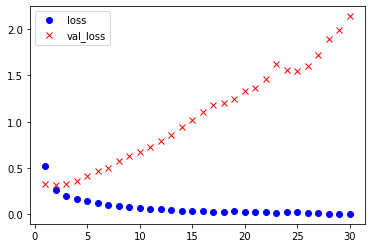

In [68]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'rx', label='val_loss')
plt.legend()
plt.show()

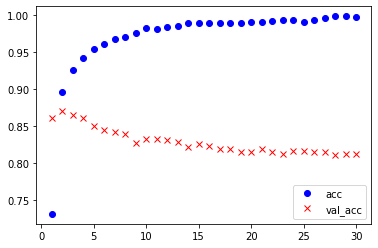

In [69]:
plt.figure()
plt.plot(epochs, acc, 'bo', label='acc')
plt.plot(epochs, val_acc, 'rx', label='val_acc')
plt.legend()
plt.show()

Prints from old performance:

In [ ]:

print(time_taken)
print(dir(history.history))

55.93441081047058
['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [ ]:
import matplotlib.pyplot as plt
stats = history.history
val_acc = stats['val_acc']
acc = stats['acc']
val_loss = stats['val_loss']
loss = stats['loss']
epochs = range(1,HP_epochs+1)


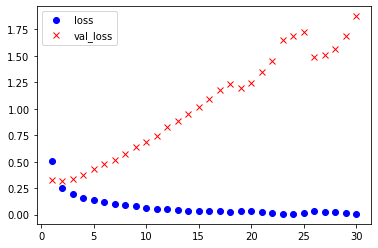

In [ ]:
plt.figure()
plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'rx', label='val_loss')
plt.legend()
plt.show()

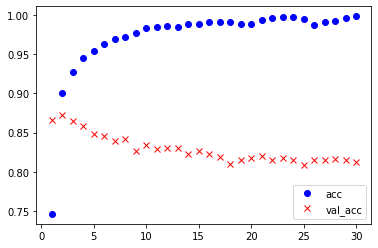

In [ ]:
plt.figure()
plt.plot(epochs, acc, 'bo', label='acc')
plt.plot(epochs, val_acc, 'rx', label='val_acc')
plt.legend()
plt.show()

In [ ]:
# COMPLETE model-> shape + weights

# transferred the shape-> Neural network architecture
# transfer the weights-> learnt by training

# complete model
m1.save('myfirstmodel.h5')
!ls

myfirstmodel.h5  sample_data


In [ ]:
# save partial models
shape_m1 = m1.to_json() # shape of model
with open('m1.json','w') as myFile:
  myFile.write(shape_m1)

m1.save_weights('m1weights.h5') # weights of model
!ls

m1.json  m1weights.h5  myfirstmodel.h5	sample_data


In [ ]:
!cat m1.json

{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "Embedding", "config": {"name": "embedding", "trainable": true, "batch_input_shape": [null, null], "dtype": "float32", "input_dim": 10000, "output_dim": 16, "embeddings_initializer": {"class_name": "RandomUniform", "config": {"minval": -0.05, "maxval": 0.05, "seed": null, "dtype": "float32"}}, "embeddings_regularizer": null, "activity_regularizer": null, "embeddings_constraint": null, "mask_zero": false, "input_length": null}}, {"class_name": "GlobalAveragePooling1D", "config": {"name": "global_average_pooling1d", "trainable": true, "dtype": "float32", "data_format": "channels_last"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 64, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null, "dtype": "float32"}}, "bias_initializer": {"class_name": "Zeros", "config": {"dtype": "float32

In [ ]:
# another file
from tensorflow.keras.models import model_from_json
newm_shape = open('m1.json','r')
loaded_json = newm_shape.read()
newModel = model_from_json(loaded_json)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
newModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 169,537
Trainable params: 169,537
Non-trainable params: 0
_________________________________________________________________


In [ ]:
newModel.load_weights('m1weights.h5')